In [48]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [27]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [6]:
df.shape

(891, 12)

# Handling missing values

In [25]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.duplicated().sum()

0

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

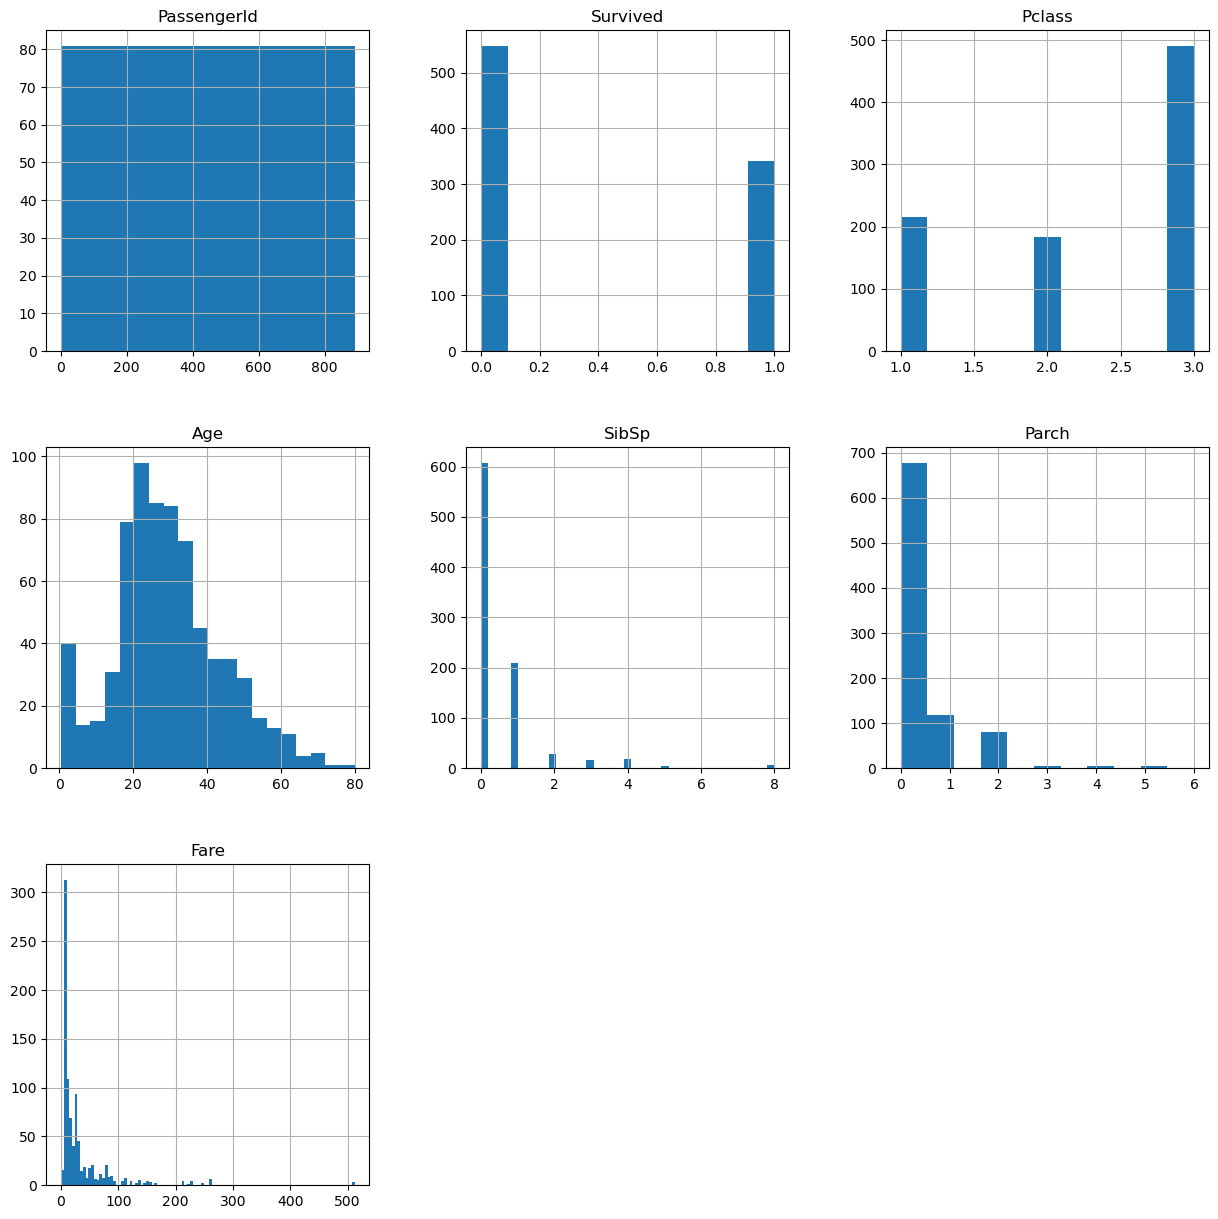

In [10]:
df.hist(bins='auto',figsize=(15,15))

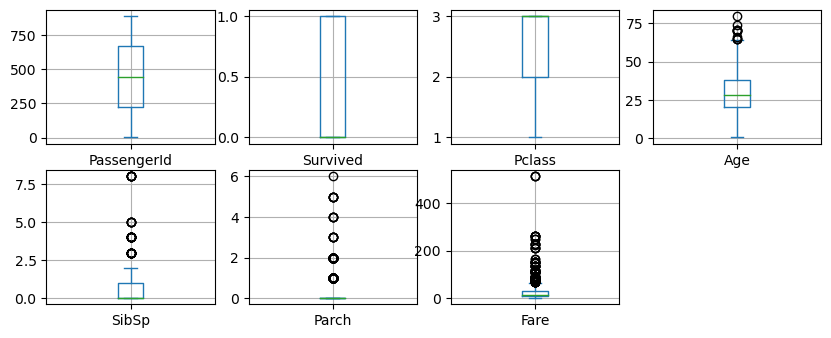

In [12]:
df[['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']].plot(kind='box', subplots=True, layout=(4,4), figsize=(10,8), grid=True);


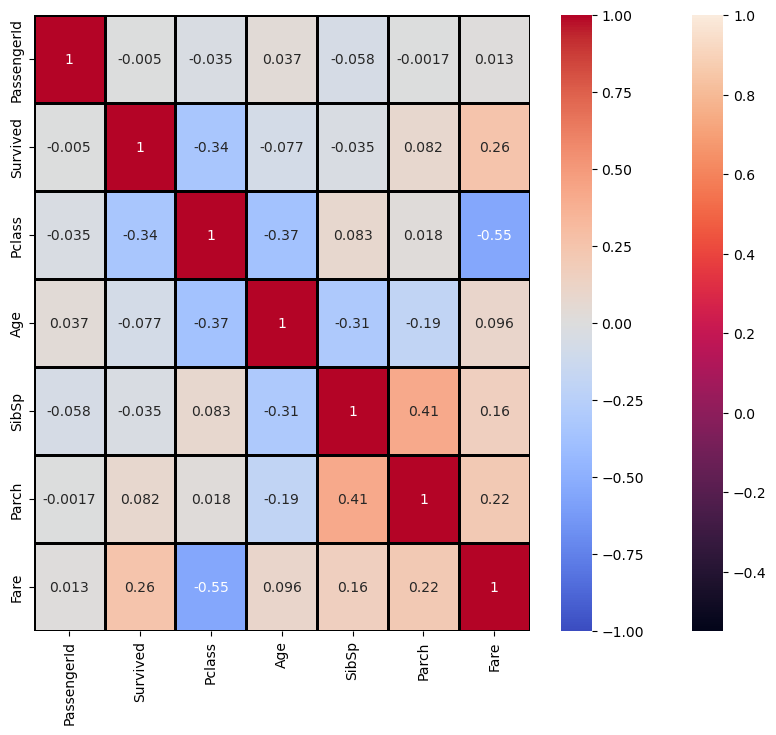

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,center=0,cmap='coolwarm',linewidth=1,linecolor='black')
plt.show()

In [15]:
#Get the count Survived onboarded in titanic
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### number of Survived =1
### number on non Survived=0

# Visualizing survival data based on age

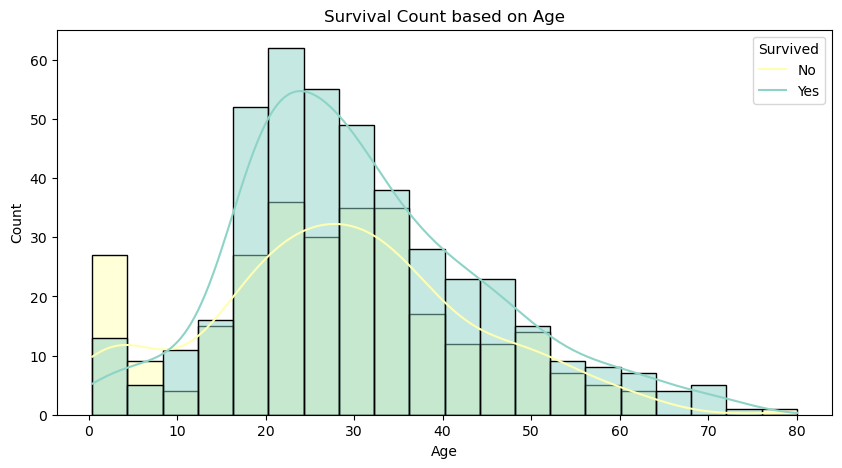

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(x='Age', hue='Survived', data=df, kde=True, palette='Set3')
plt.title('Survival Count based on Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

# Visualizing survival data based on gender

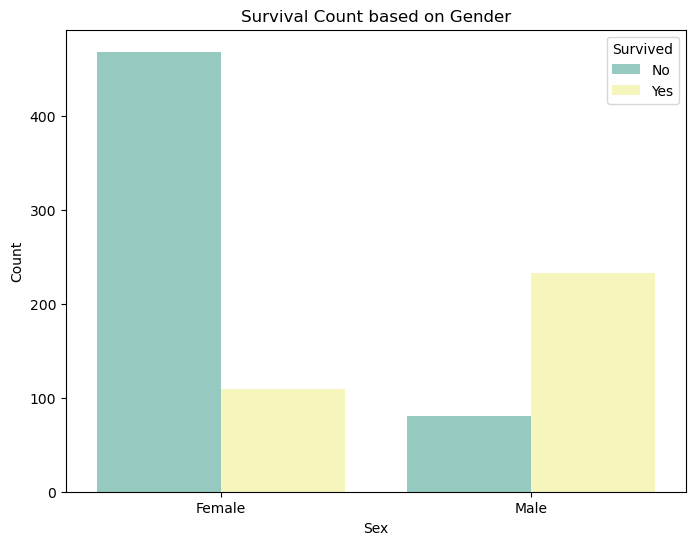

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set3')
plt.title('Survival Count based on Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

## Visualizing survival data based on number of parents/children aboard (Parch)

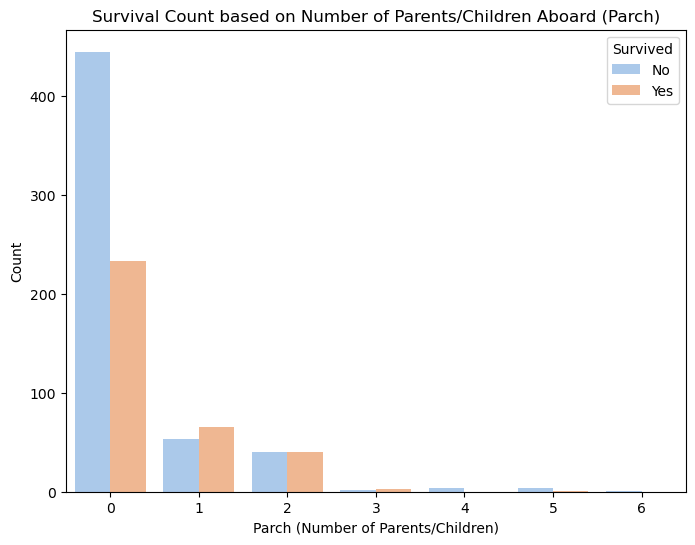

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Parch', hue='Survived', data=df, palette='pastel')
plt.title('Survival Count based on Number of Parents/Children Aboard (Parch)')
plt.xlabel('Parch (Number of Parents/Children)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

In [29]:
# Droping columns that are not useful for our prediction
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [39]:
#I am taking 20 percent of the complete dataset for testing purpose and the remaing 80 percent with be used to train the model
# Droping survived from X and allocate it in y variable
X = df.drop('Survived', axis=1)
y = df['Survived']

In [50]:
# converting the categorical values to numerical values for training data 
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [51]:
# Droping survived from X and allocate it in y variable
X = df.drop('Survived', axis=1)
y = df['Survived']
# Split the training data into training and testing sets(70% tarining data and testing data 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
#Traning the algorithm

lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [53]:
# comparing actual values with predicted values
y_pred = lm.predict(X_test)

actual_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_pred 

,Actual,Predicted
709,1,0.152958
439,0,0.237732
840,0,0.143438
720,1,0.851809
39,1,0.737068
...,...,...
821,1,0.108863
633,0,0.396474
456,0,0.222903
500,0,0.158682


In [54]:
#making a dataframe of the coeffiecients to help us easily determine which variable carries more weight

coefficient = lm.coef_

coefficient_df = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['features', 'coefficients'])
coefficient_df             
                

,features,coefficients
0,Pclass,-0.148052
1,Sex,-0.498198
2,Age,-0.004982
3,SibSp,-0.035235
4,Parch,-0.017788
5,Fare,0.000405
6,Embarked,-0.049715


### Modle Evaluation

In [55]:
print('Root Mean Squared Error:', np.sqrt(MSE(y_test, y_pred)))

Root Mean Squared Error: 0.3689880996399548
